In [93]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#reading the dataset
data=pd.read_csv('car data.csv')
print(data.shape)
data.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


From the dataset preview, Selling_Price is the dependent variable and the rest are independent variables

Top 10 cars:

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: Car_Name, dtype: int64


Text(0, 0.5, 'CDF')

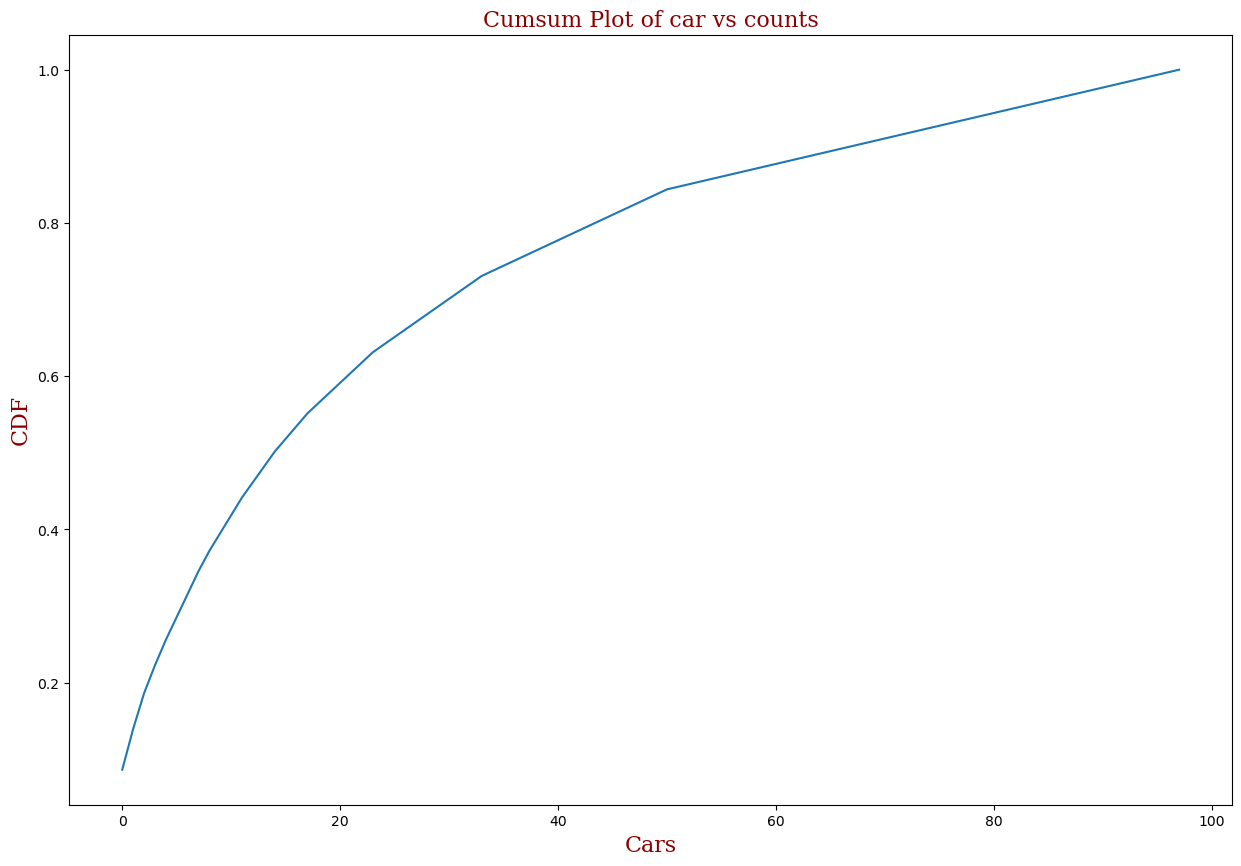

In [95]:
print("Top 10 cars:\n")
print(data.Car_Name.value_counts().head(10))
      
y = data.Car_Name.value_counts(normalize=True).cumsum()
x = len(y)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(15,10))
plt.plot(range(x),y);
plt.title('Cumsum Plot of car vs counts', fontdict = font)
plt.xlabel('Cars', fontdict = font)
plt.ylabel('CDF', fontdict = font)

# Checking if there are any missing values 

In [96]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Checking cardinality of independent categorical variables in the dataset

In [97]:
print('Unique elements in Seller_Type are',data['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',data['Fuel_Type'].unique())
print('Unique elements in Transmission are',data['Transmission'].unique())
print('Unique elements in Owner are',data['Owner'].unique())
print('Unique elements in Year are',data['Year'].unique())

Unique elements in Seller_Type are ['Dealer' 'Individual']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [0 1 3]
Unique elements in Year are [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [98]:
print('Unique elements in Car_Name are',data['Car_Name'].nunique())
#98 unique elements 
#so, rather than encoding it, we can just drop this columbn as it doesn' make sense

Unique elements in Car_Name are 98


In [99]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Feature Engineering

In [100]:
dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


###### defining a feature variable 'Present_Year' which has all the element values as 2020. On subtracting 'Present_Year' and 'Year', we can make another feature variable as 'Number_of_Years_Old', which gives us idea about how old the car is.

In [101]:
dataset['Present_Year']=2020
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Number_of_Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


So, we can now safely drop 'Year' and 'Present_Year' columns

In [102]:
dataset.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# Encoding the Categorical Variables

In [103]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=dataset[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=dataset[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)

dataset.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


#to reduce the multicollinearity we dropped cng --Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model.

In [104]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_Years_Old', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [105]:
# Dataset Correlation
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Years_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


# Data Visualization and Correlation

<AxesSubplot:>

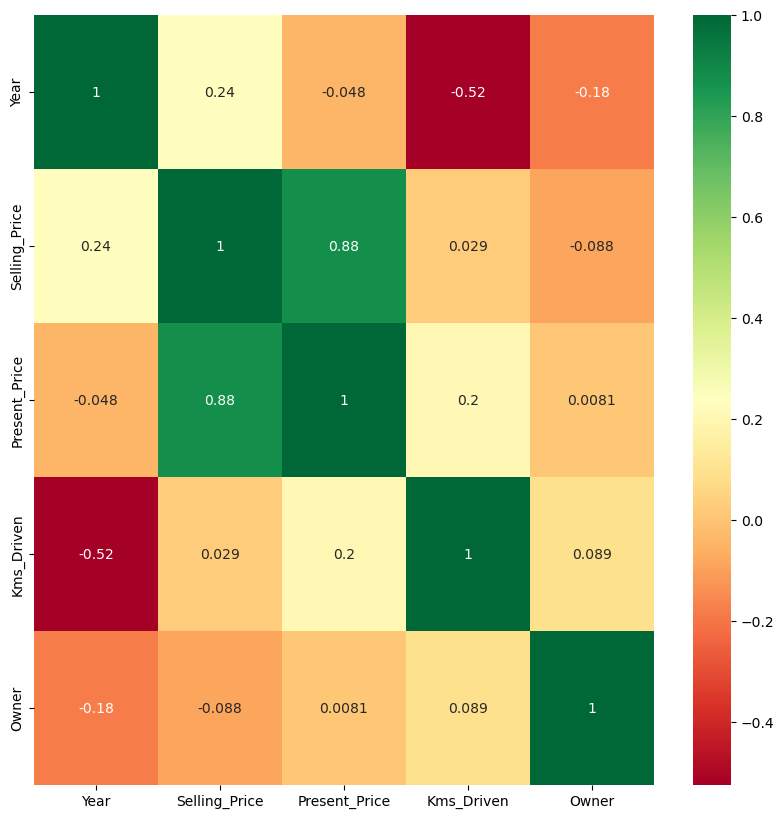

In [106]:
#Correlations of features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

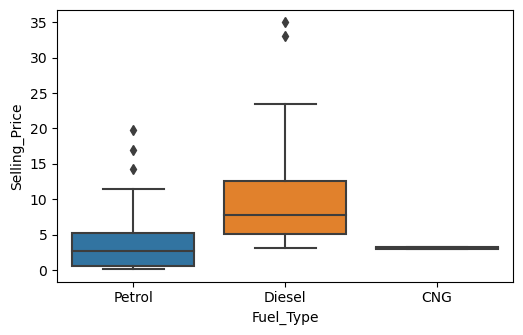

In [107]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fuel_Type', y = 'Selling_Price', data = data)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

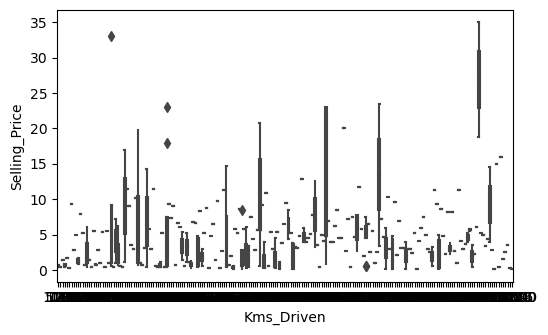

In [108]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Kms_Driven', y = 'Selling_Price', data = data)

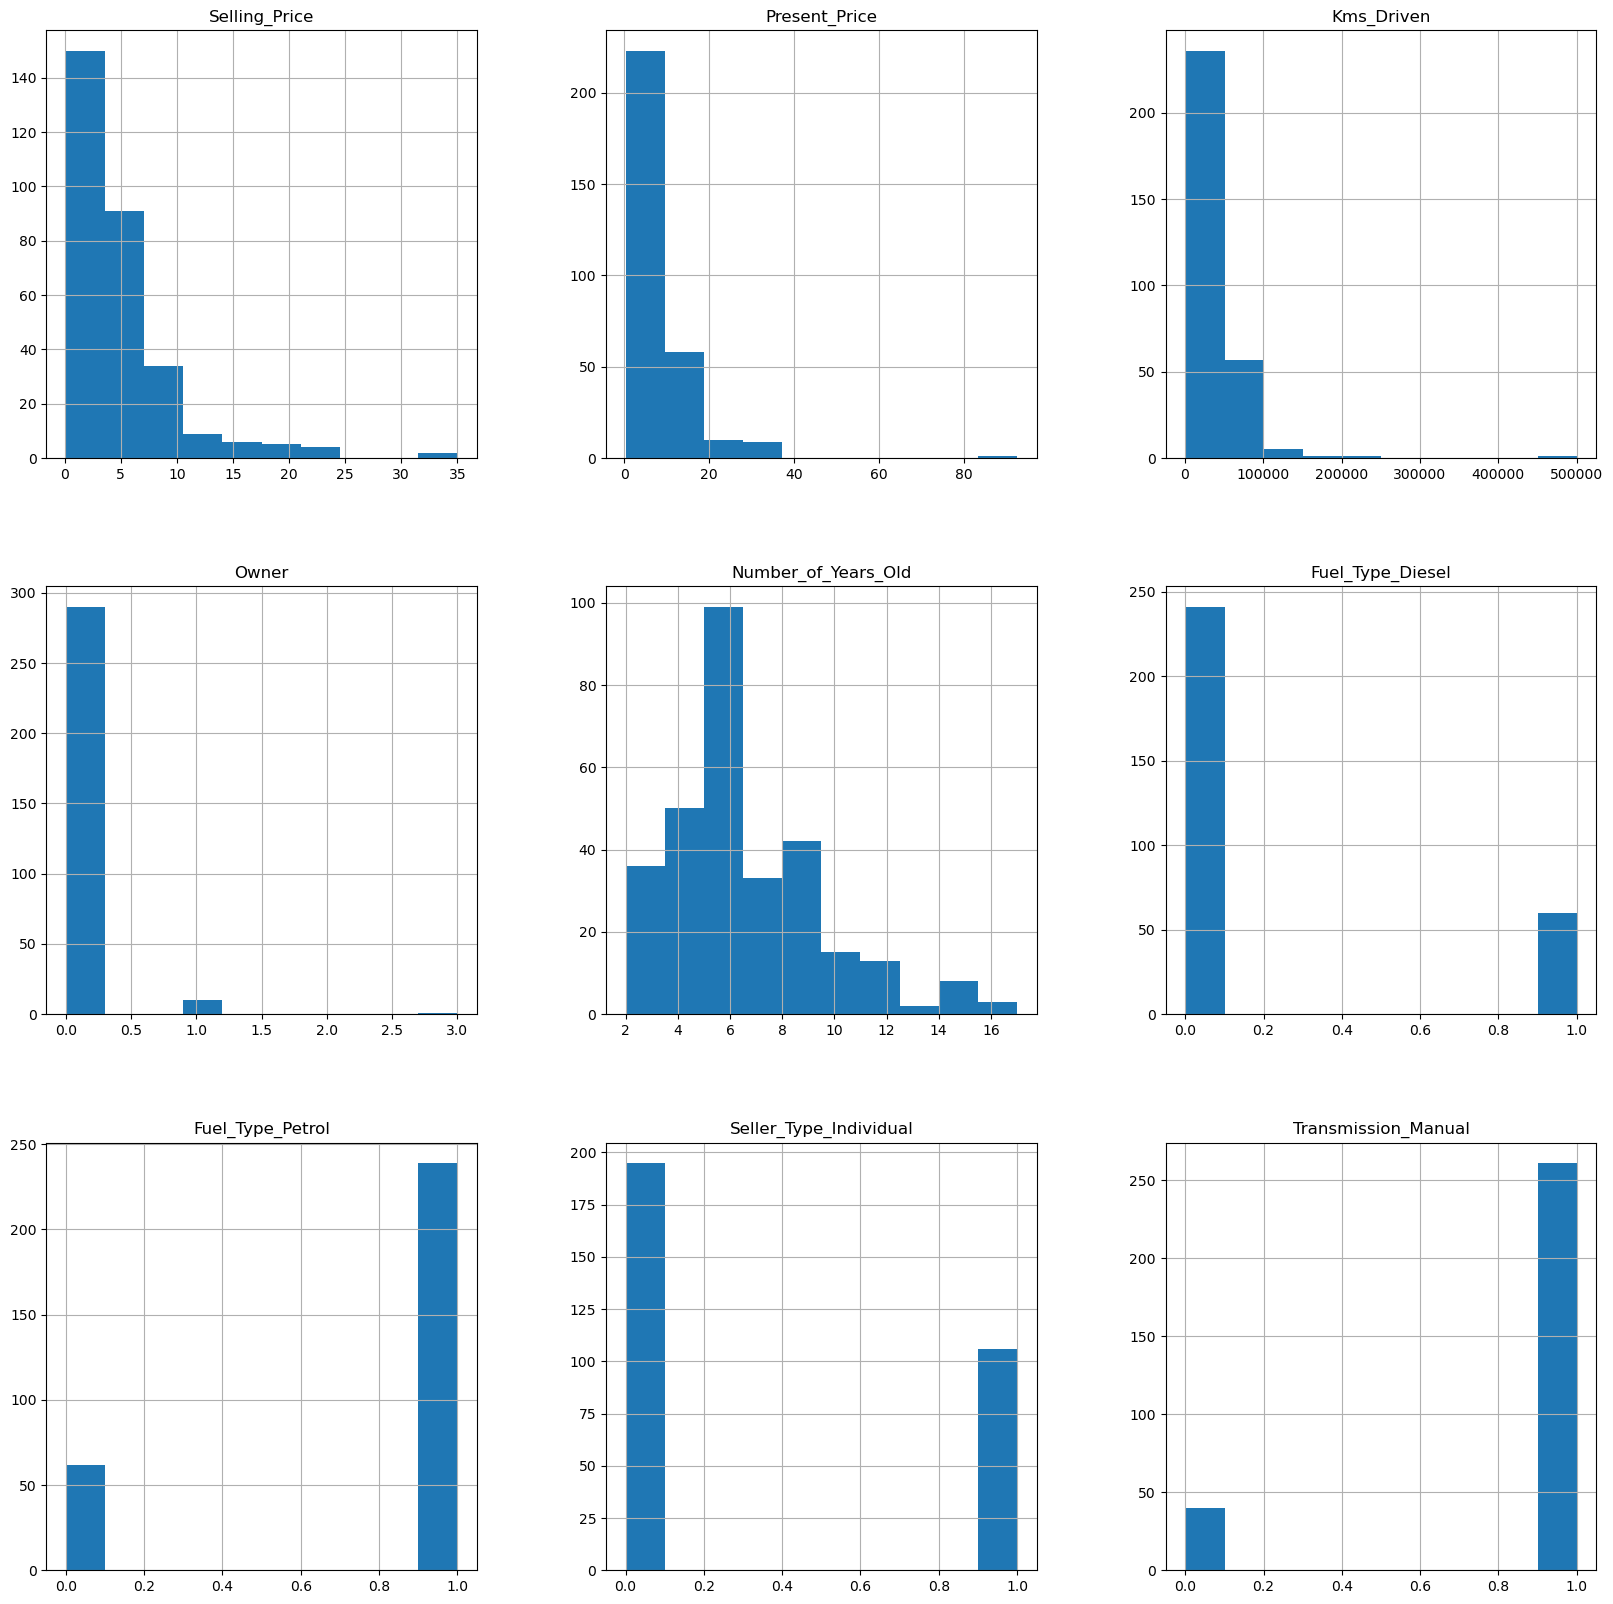

In [109]:
p = dataset.hist(figsize = (20,20))

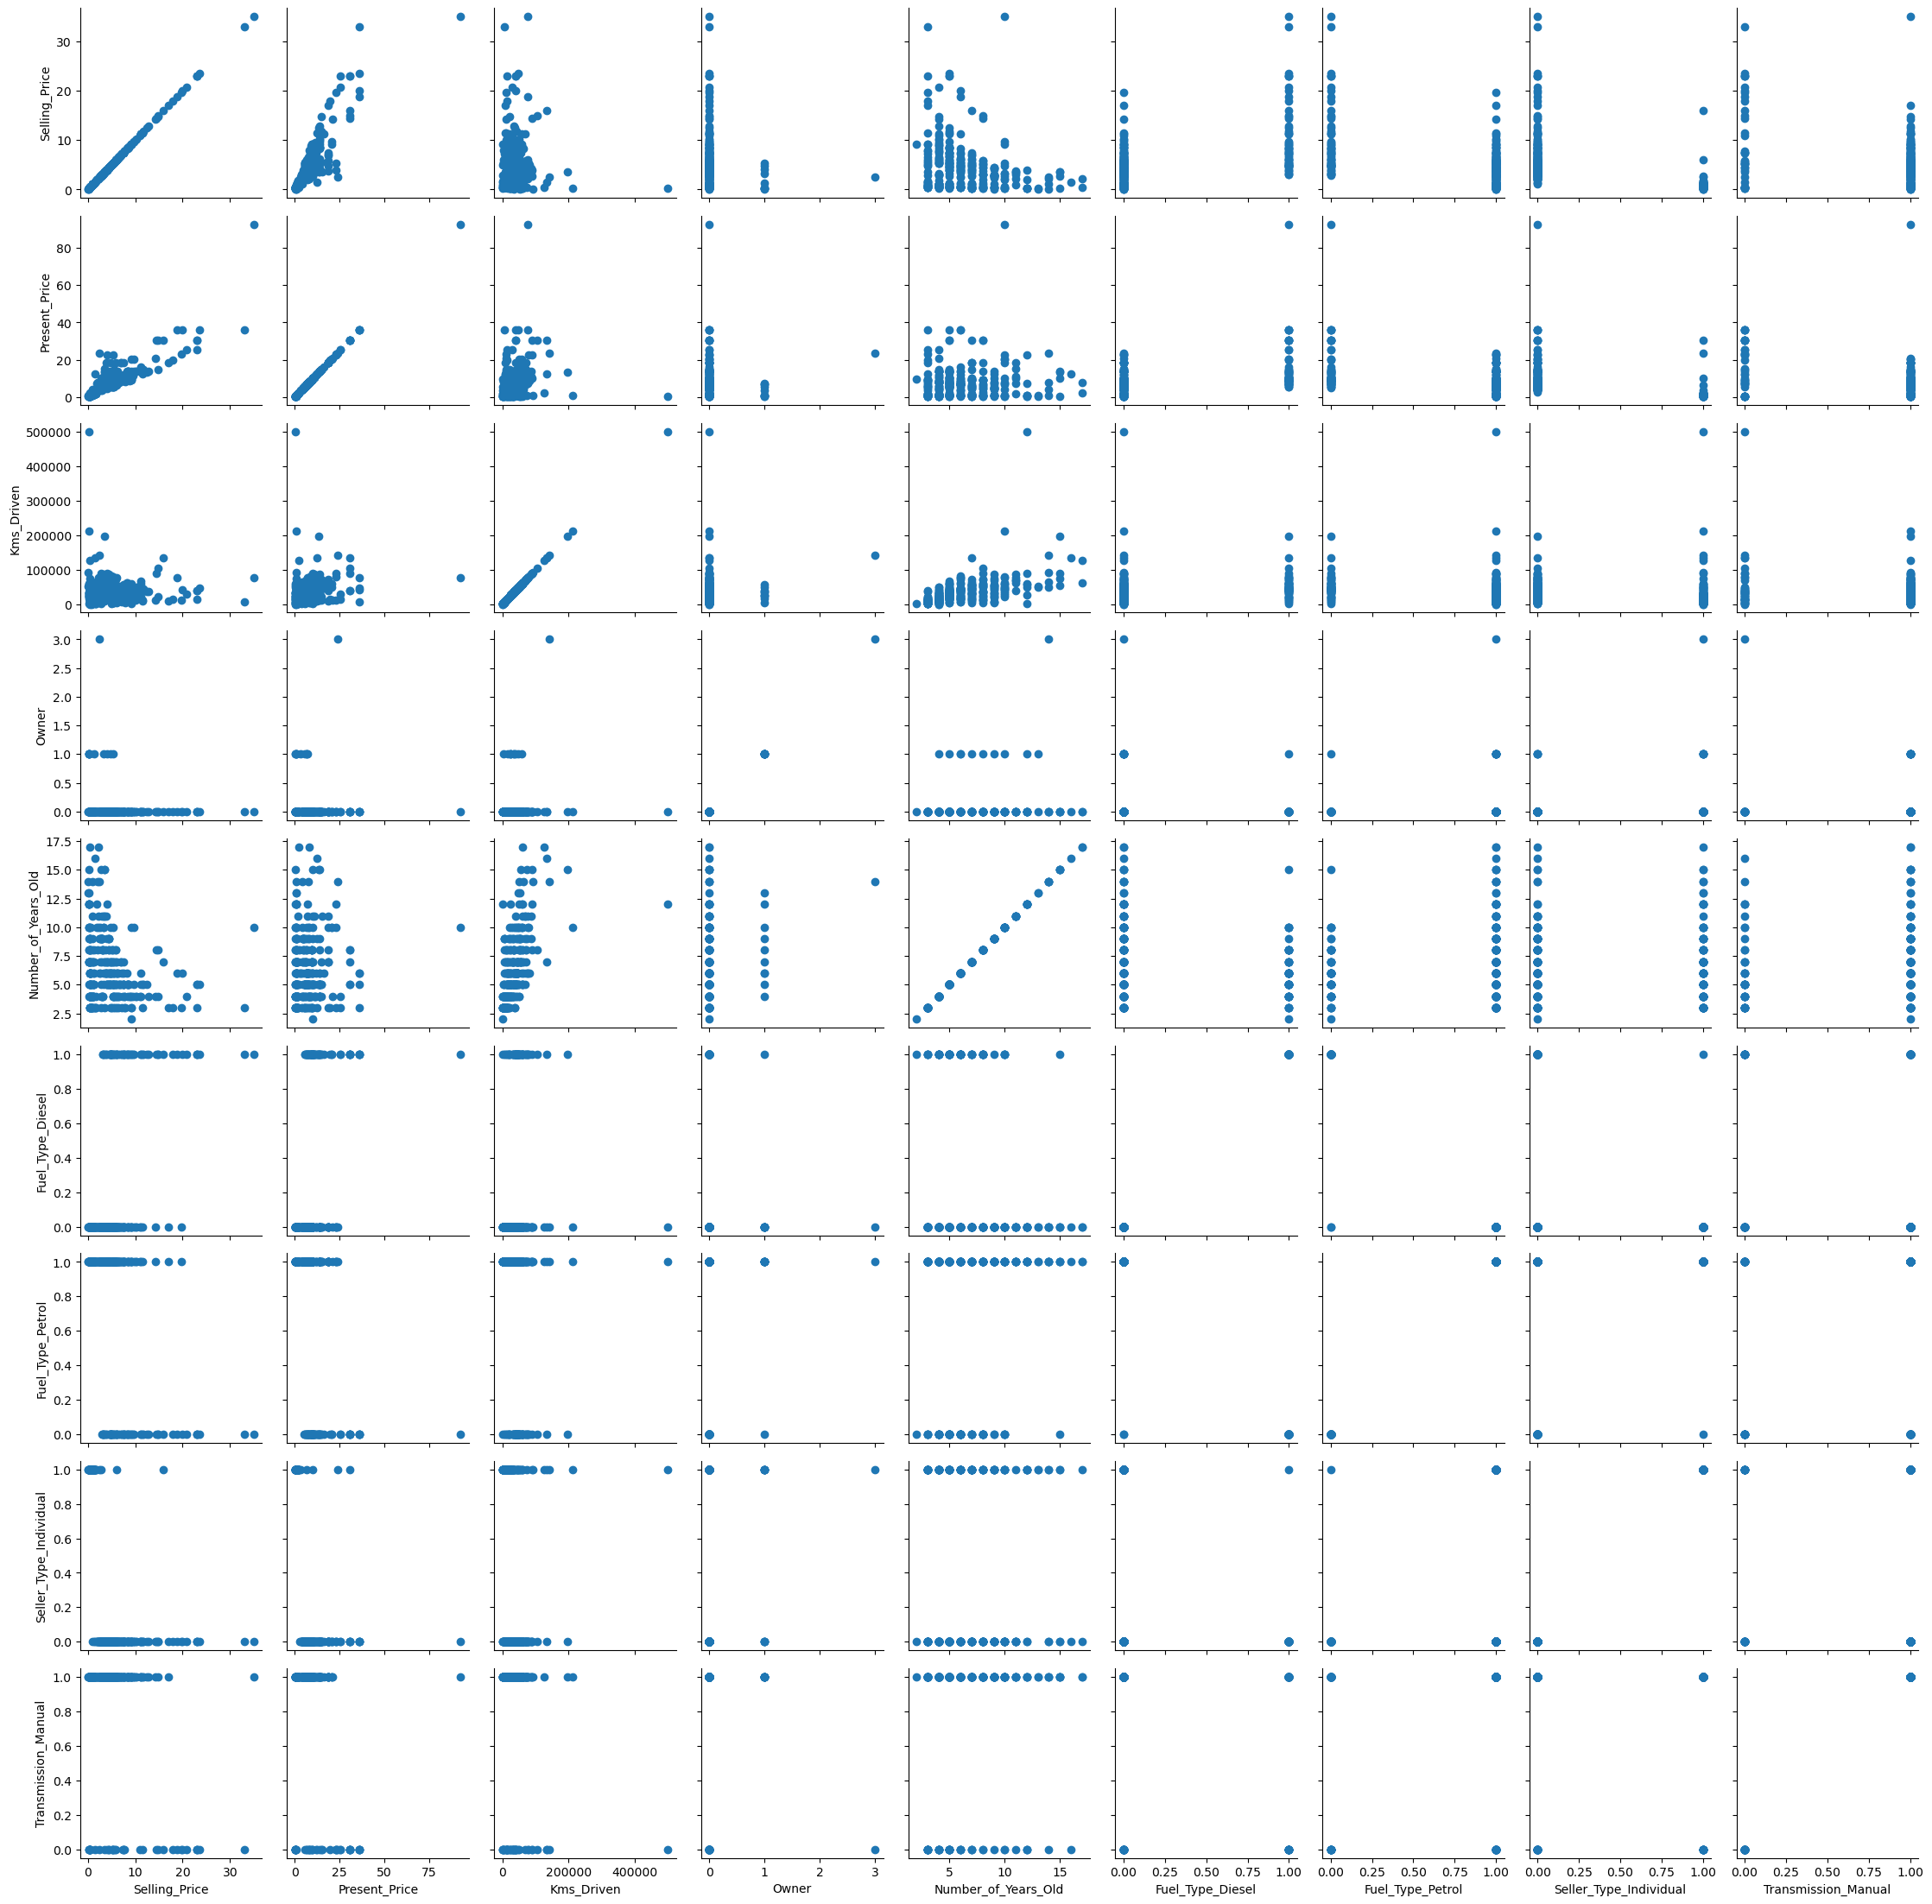

In [110]:
g=sns.PairGrid(dataset)
g.map(plt.scatter)

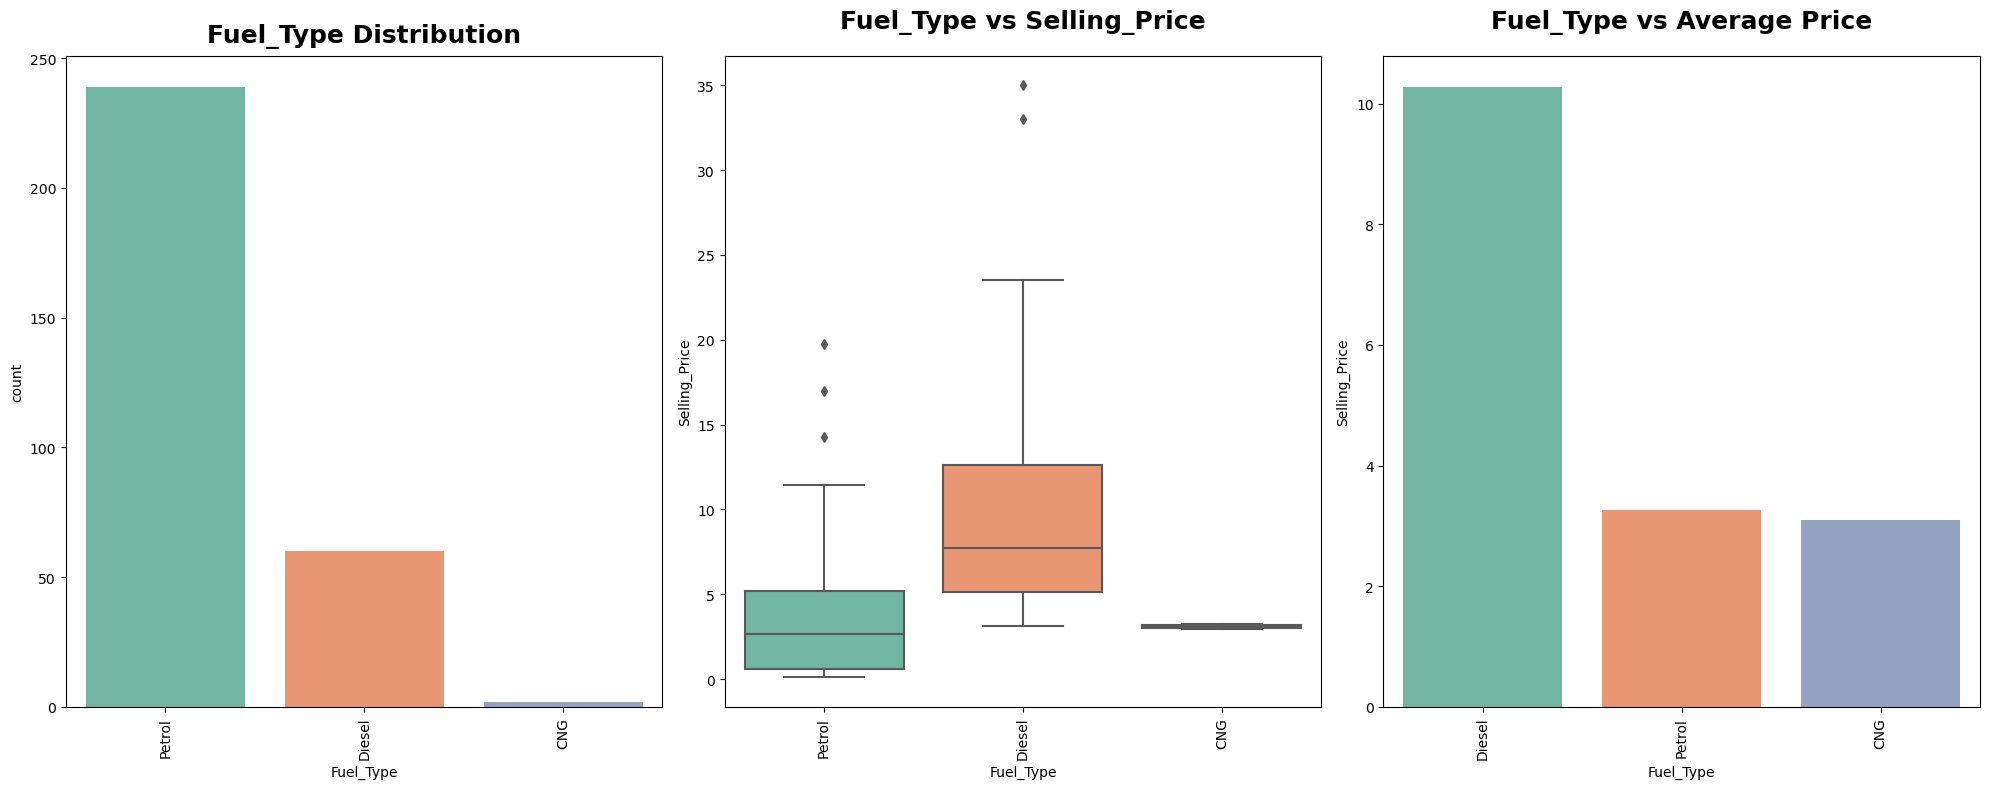

In [111]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=data,palette="Set2",order=data[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="Selling_Price",data=data,palette="Set2")
    plt.title(f"{cols} vs Selling_Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(data.groupby(cols)["Selling_Price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="Selling_Price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("Fuel_Type")

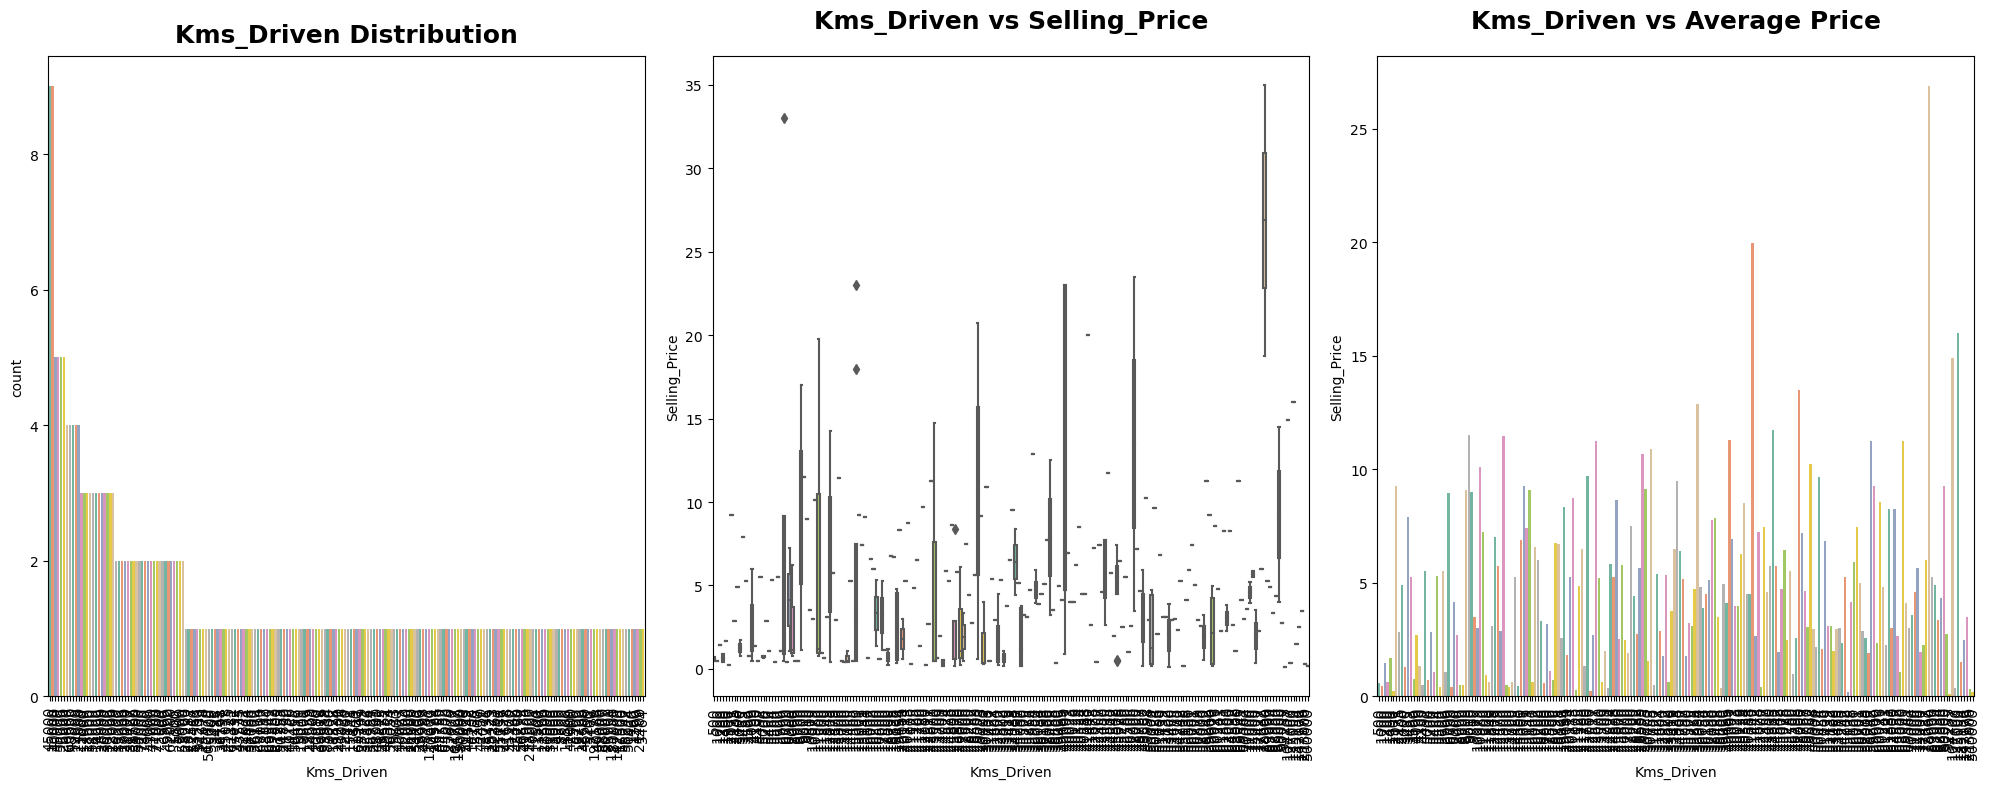

In [112]:
categorical_visualization("Kms_Driven")

In [113]:
sell=dataset['Selling_Price']
dataset.drop(['Selling_Price'], axis=1, inplace=True)
dataset=dataset.join(sell)
dataset.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,5.59,27000,0,6,0,1,0,1,3.35
1,9.54,43000,0,7,1,0,0,1,4.75
2,9.85,6900,0,3,0,1,0,1,7.25
3,4.15,5200,0,9,0,1,0,1,2.85
4,6.87,42450,0,6,1,0,0,1,4.60


In [114]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

[0.4046579  0.04194815 0.0008649  0.07983709 0.21022608 0.01428844
 0.12603296 0.12214448]


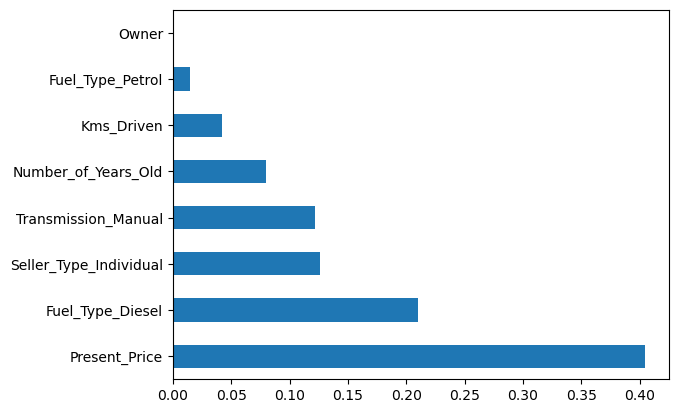

In [115]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

'Owner' has zero feature importance i.e. nil on the dependent variable, 'Selling_Price'

# Model Building and Training

In [116]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [119]:
accuracy = []
r2score = []
mean2=[]
meanabsoulte=[]
rmse=[]

# Linear Regressor

Linear Regressor Score on Training set is 0.8926207626208046
Linear Regressor Score on Test Set is 0.8517983059778262
[0.84989767 0.91045493 0.75641733 0.66228803 0.84093716]
Accuracy: 80.40 %
Standard Deviation: 8.62 %
Mean Absolute Error: 1.2426713915033707
Mean Squared Error: 4.432128265667619
RMSE: 2.1052620420431323
The r2_score is 0.8517983059778262


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


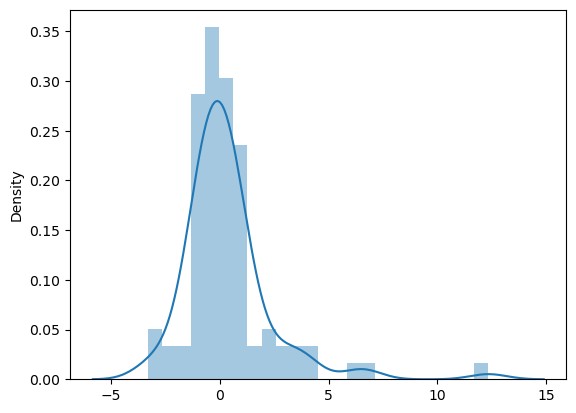

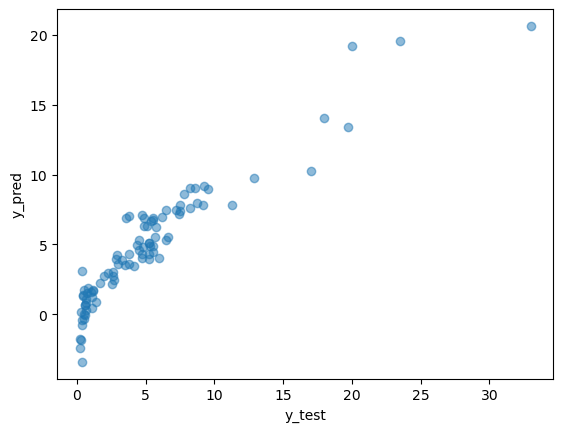

In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Linear Regressor Score on Training set is",model.score(X_train, y_train))#Training Accuracy
print("Linear Regressor Score on Test Set is",model.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(model, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))
accuracy.append(accuracies.mean()*100)
r2score.append(metrics.r2_score(y_test, y_pred))
mean2.append(mse)
meanabsoulte.append(mae)
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

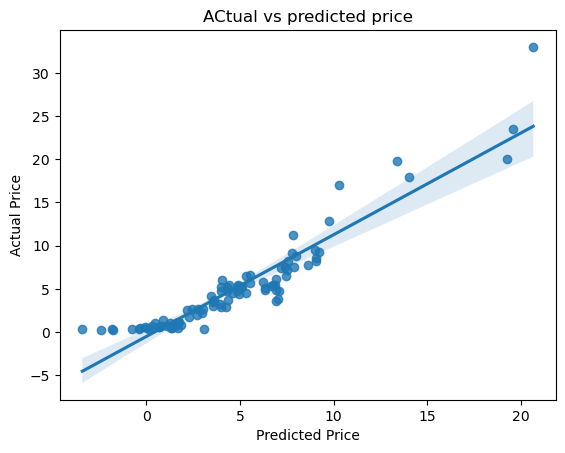

In [121]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

# Decision Tree Regressor

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.9202815383374512
[0.9542394  0.84409548 0.69916028 0.924205   0.92156403]
Accuracy: 86.87 %
Standard Deviation: 9.22 %
Mean Absolute Error: 0.8102197802197801
Mean Squared Error: 2.3840648351648355
RMSE: 1.5440417206684653
The r2_score is 0.9202815383374512


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


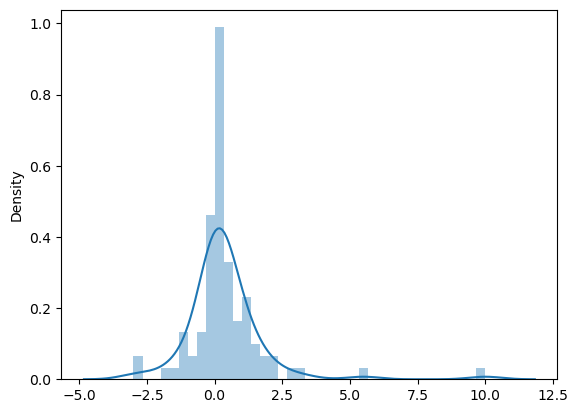

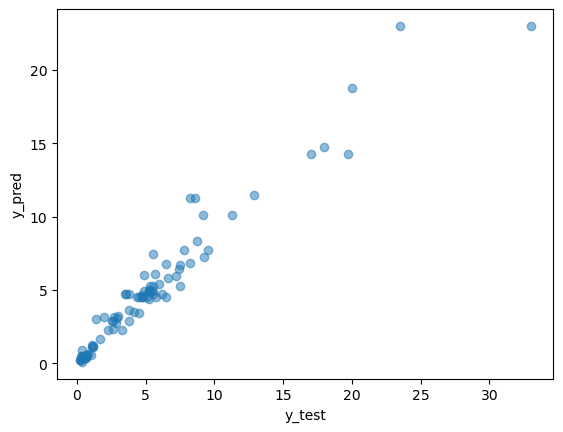

In [122]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

accuracy.append(accuracies.mean()*100)
r2score.append(metrics.r2_score(y_test, y_pred))
mean2.append(mse)
meanabsoulte.append(mae)
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

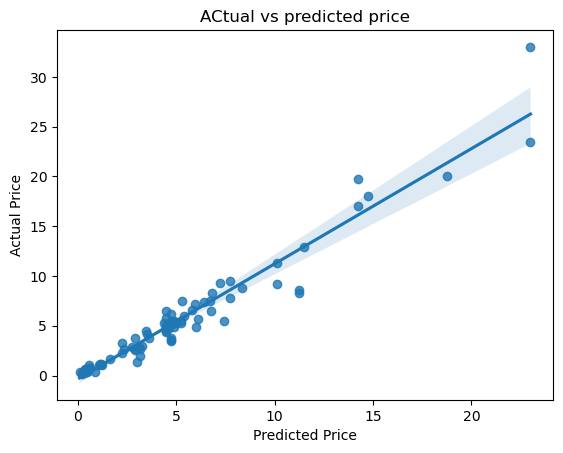

In [123]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

# Random Forest Regressor

Random Forest Score on Training set is 0.910266568514969
Random Forest Score on Test Set is 0.8671354048467697
[0.94820538 0.816767   0.62988664 0.83125856 0.93028691]
Accuracy: 83.13 %
Standard Deviation: 11.34 %
Mean Absolute Error: 0.8836663992663134
Mean Squared Error: 3.973456117154846
RMSE: 1.993352983581896
The r2_score is 0.8671354048467697


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


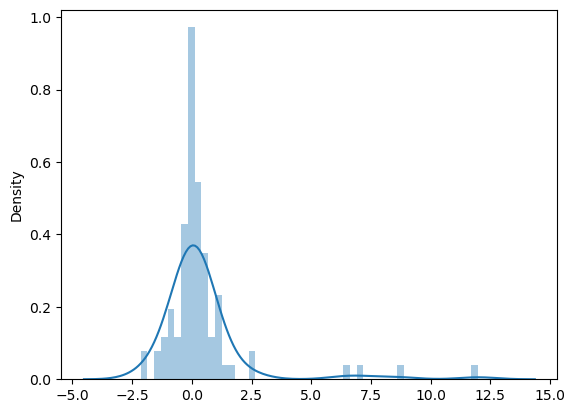

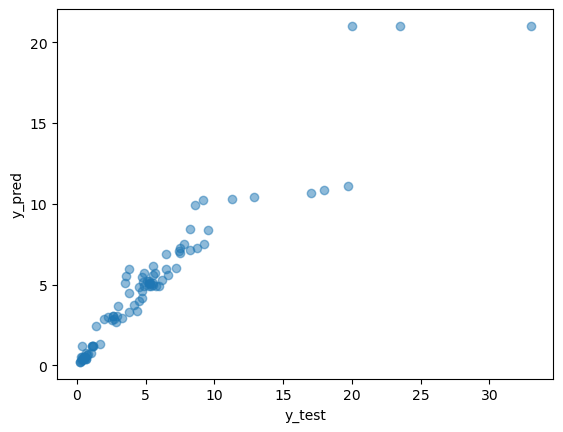

In [124]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))
accuracy.append(accuracies.mean()*100)
r2score.append(metrics.r2_score(y_test, y_pred))
mean2.append(mse)
meanabsoulte.append(mae)
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

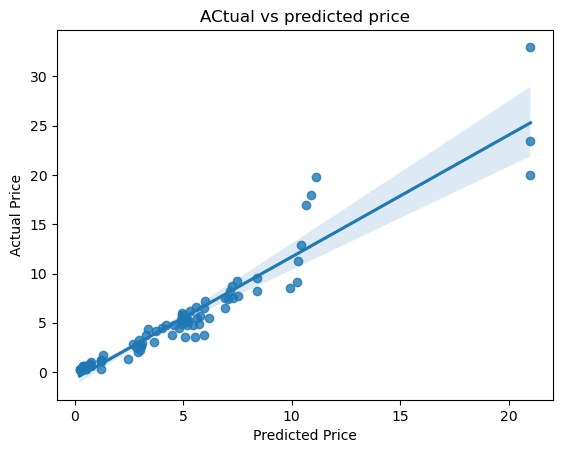

In [125]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

## Voting Regressor
Voting Regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset to average the individual predictions to form a final prediction.

Voting Regresssor Score on Training set is 0.9747670501881848
Voting Regresssor Score on Test Set is 0.8983795201953172
[0.95785591 0.93777113 0.73902928 0.89954763 0.95815186]
Accuracy: 89.85 %
Standard Deviation: 8.25 %
Mean Absolute Error: 0.8544876881826632
Mean Squared Error: 3.039067831745924
RMSE: 1.743292239340818
The r2_score is 0.8983795201953172


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


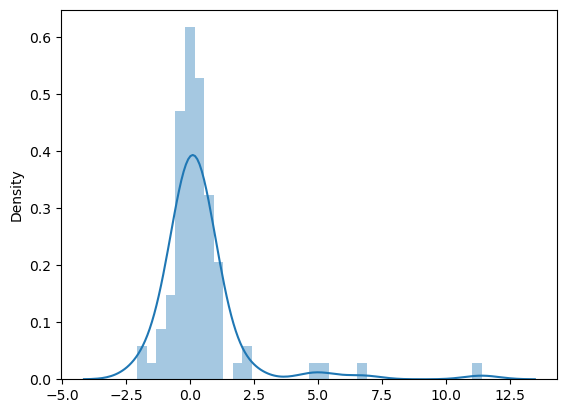

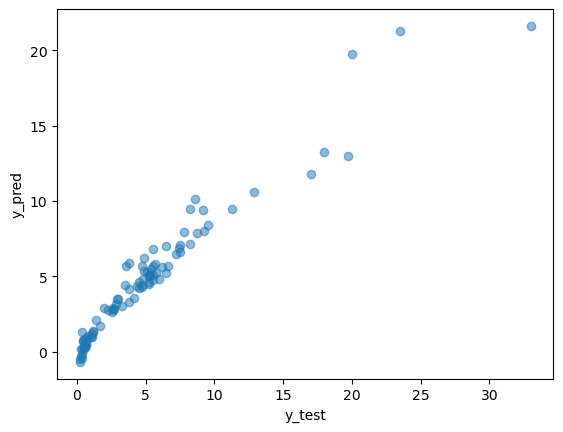

In [126]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg),('LinearRegressor', model)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

accuracy.append(accuracies.mean()*100)
r2score.append(metrics.r2_score(y_test, y_pred))
mean2.append(mse)
meanabsoulte.append(mae)
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#So, the XGBoost Regressor gave us best scores on the Training Dataset

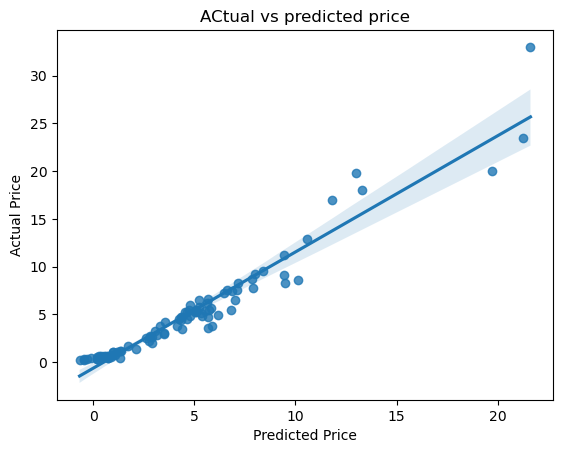

In [127]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [128]:
models = ["Linear Regression","Decision Tree","Random Forest","X_boost"]

In [129]:
df = pd.DataFrame({"Algorithms":models,
                   "Accuracy Score":accuracy,
                   "r^2 Score":r2score,
                  "mse":mean2,
                  "mae":meanabsoulte,
                  "rmse":rmse})

In [130]:
df

,Algorithms,Accuracy Score,r^2 Score,mse,mae,rmse
0,Linear Regression,80.399903,0.851798,4.432128,1.242671,2.105262
1,Decision Tree,86.865284,0.920282,2.384065,0.810220,1.544042
2,Random Forest,83.128090,0.867135,3.973456,0.883666,1.993353
3,X_boost,89.847116,0.898380,3.039068,0.854488,1.743292


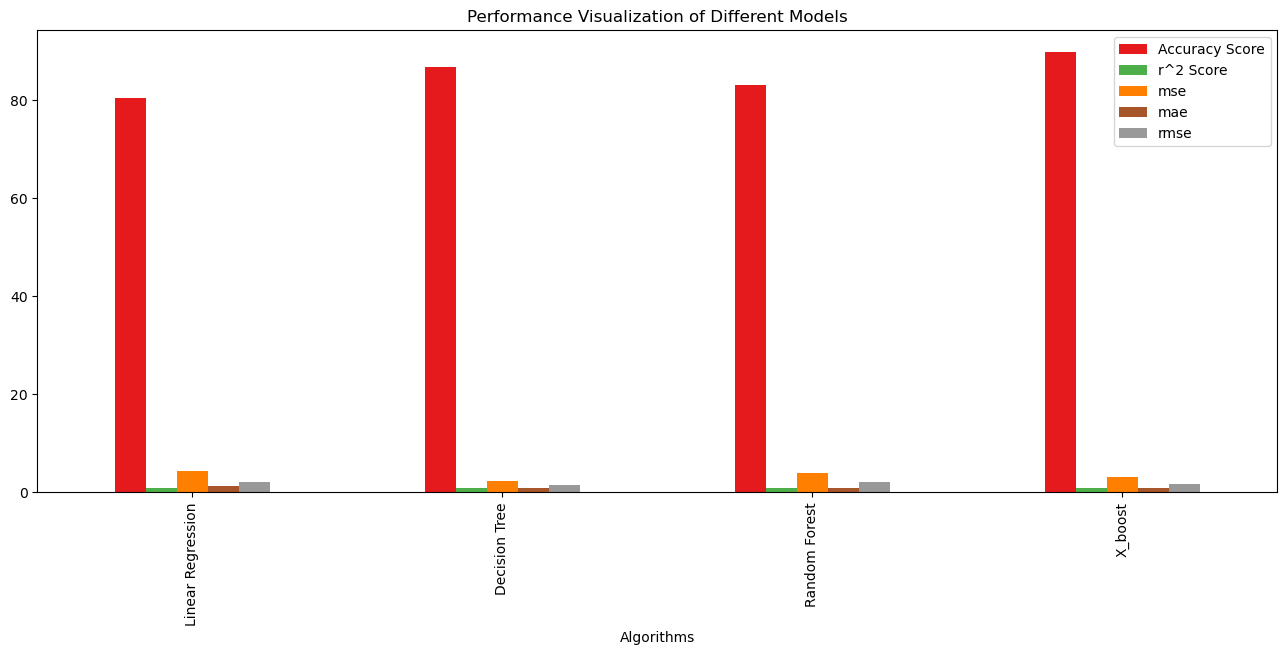

In [135]:
df.plot(x="Algorithms",y=["Accuracy Score","r^2 Score","mse","mae","rmse"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## Model deployment by Dumping the model selected as a Pickle File

In [131]:
import pickle
pickle.dump(vot_reg, open("vot_reg.pkl", "wb"))

# load model from file
model1 = pickle.load(open("vot_reg.pkl", "rb"))

In [132]:
model1.predict([[9.85, 6900, 0, 3, 0, 1, 0, 1]])

array([7.19241174])

In [133]:
model.predict([[7.85, 8000, 0, 2, 1, 2, 0, 1]])

array([9.69233381])

In [134]:
model.predict([[11.0, 2000, 0, 1, 1, 2, 0, 1]])

array([11.34874994])

###### The car has more Selling price when the kms driven is less 